Instalando dependências...
✓ Dependências instaladas

Importações concluídas!

Classes definidas!

✓ Carregados 21 pontos

✓ Grafo com 21 vértices construído

✓ Otimização concluída

✓ Análise de algoritmos concluída

                    RESUMO DA OTIMIZAÇÃO DE ROTAS                     

Clusters criados: 3
Total de entregas: 15
Custo total: 11.91 unidades
Custo médio por cluster: 3.97
Algoritmo utilizado: a_estrela

Detalhes por cluster:

  Cluster 0:
    Pontos: 6
    Custo: 4.31 unidades
    Rota: 0 → 13 → 6 → 15 → 20 → 17 → 9 → 0

  Cluster 1:
    Pontos: 3
    Custo: 2.74 unidades
    Rota: 0 → 19 → 16 → 11 → 0

  Cluster 2:
    Pontos: 6
    Custo: 4.86 unidades
    Rota: 0 → 7 → 14 → 12 → 10 → 18 → 8 → 0


ANÁLISE COMPARATIVA DE ALGORITMOS

Testando caminho do Depósito (0) até Ponto 6:

A_ESTRELA:
  Caminho: 0 → 6
  Custo: 0.36 unidades
  Comprimento: 2 nós

BFS:
  Caminho: 0 → 6
  Custo: 0.36 unidades
  Comprimento: 2 nós

DFS:
  Caminho: 0 → 5 → 4 → 3 → 2 → 1 → 20 → 19 → 18 →

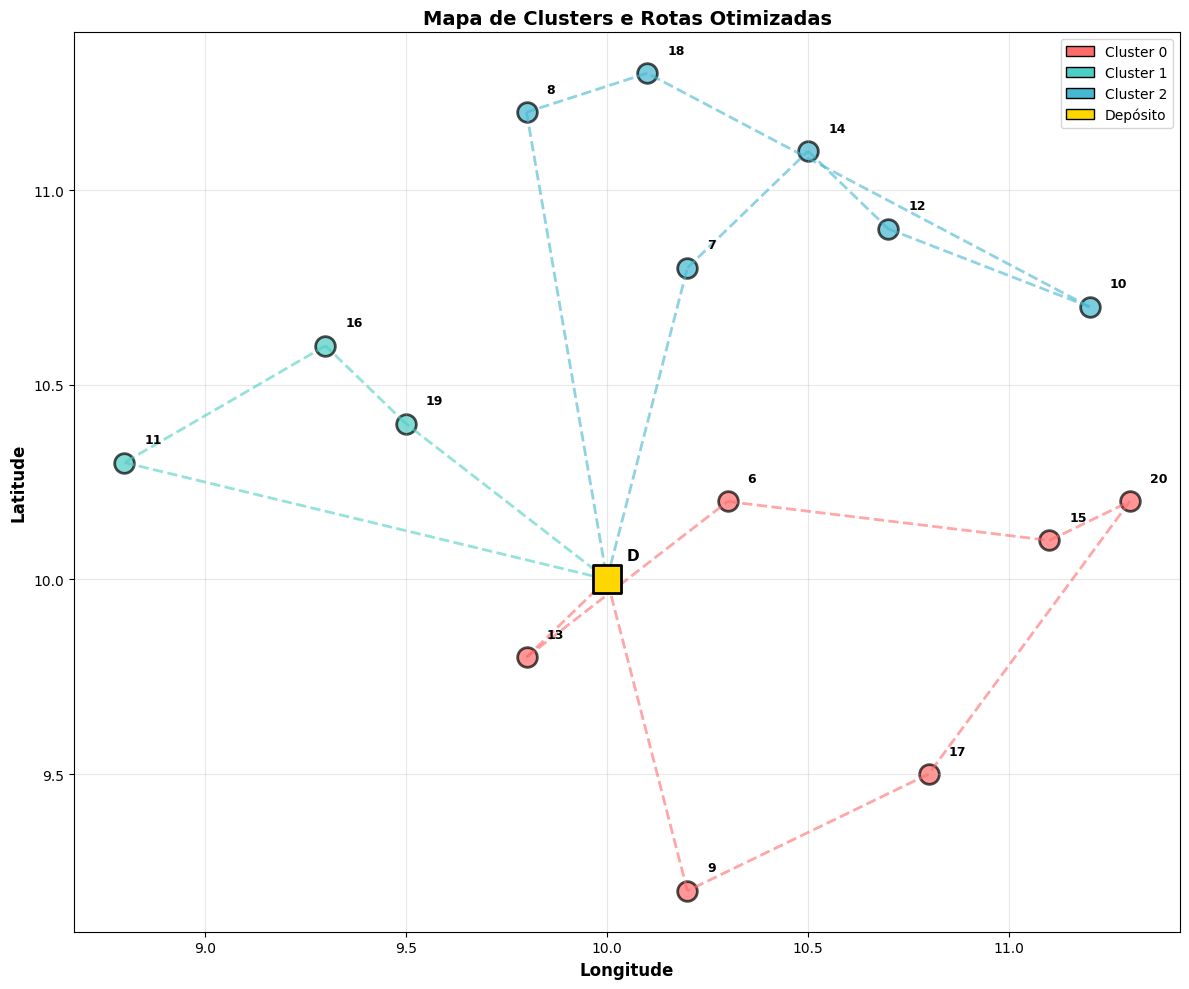

✓ Visualização 1 (Mapa de Clusters) gerada!



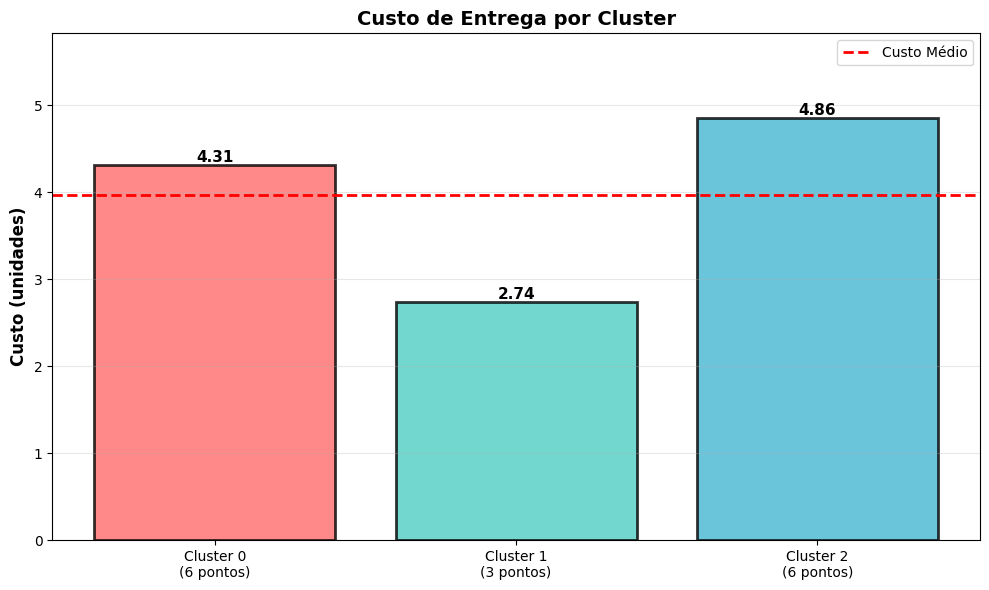

✓ Visualização 2 (Gráfico de Custos) gerada!



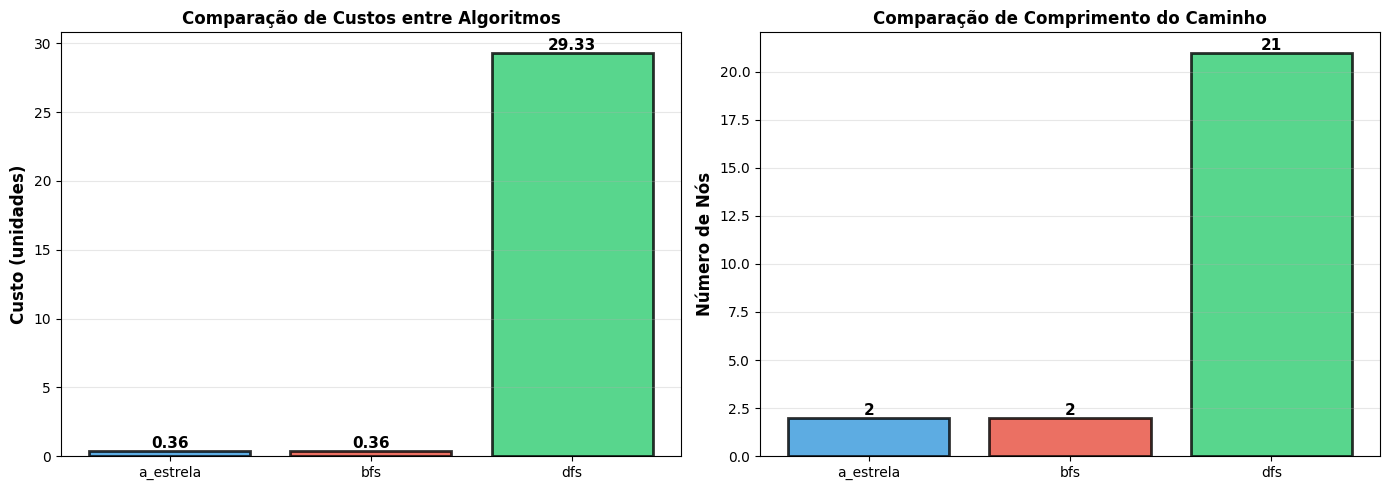

✓ Visualização 3 (Comparação de Algoritmos) gerada!



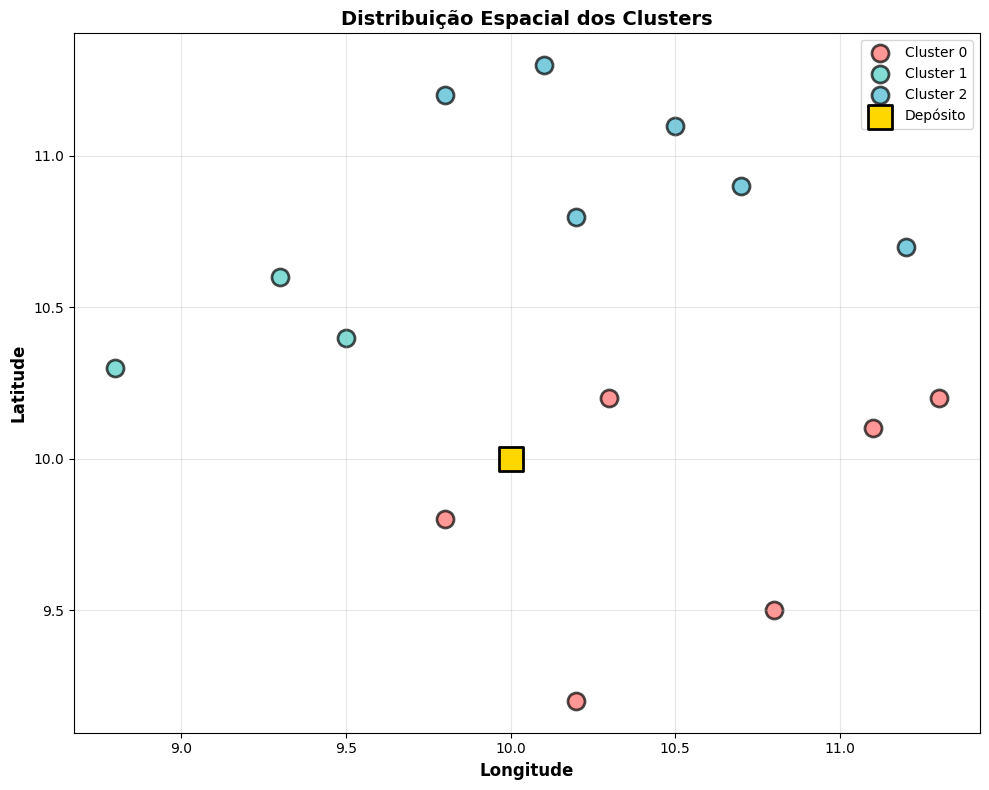

✓ Visualização 4 (Distribuição Espacial) gerada!


                          RESULTADOS EM JSON                          

--- RESULTADO OTIMIZAÇÃO ---
{
  "clusters": {
    "0": [
      6,
      9,
      13,
      15,
      17,
      20
    ],
    "1": [
      11,
      16,
      19
    ],
    "2": [
      7,
      8,
      10,
      12,
      14,
      18
    ]
  },
  "rotas": {
    "0": [
      0,
      13,
      6,
      15,
      20,
      17,
      9,
      0
    ],
    "1": [
      0,
      19,
      16,
      11,
      0
    ],
    "2": [
      0,
      7,
      14,
      12,
      10,
      18,
      8,
      0
    ]
  },
  "custos": {
    "0": 4.308661753875469,
    "1": 2.7431820133877305,
    "2": 4.8560210677141775
  },
  "custo_total": 11.907864834977376,
  "estatisticas": {
    "num_clusters": 3,
    "num_entregas": 15,
    "custo_medio_por_cluster": 3.969288278325792,
    "algoritmo_usado": "a_estrela"
  }
}

--- ANÁLISE ALGORITMOS ---
{
  "a_estrela": {
    "caminho": 

In [ ]:
# ============================================================================
# ROTA INTELIGENTE - OTIMIZAÇÃO DE ENTREGAS COM ALGORITMOS DE IA
# Código Completo para Google Colab com Visualizações
# ============================================================================

# ============================================================================
# PARTE 1: INSTALAÇÃO DE DEPENDÊNCIAS
# ============================================================================

import subprocess
import sys

print("Instalando dependências...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "numpy", "matplotlib", "plotly"])
print("✓ Dependências instaladas\n")

# ============================================================================
# PARTE 2: IMPORTAÇÕES
# ============================================================================

import heapq
import math
import json
from typing import List, Dict, Tuple, Set
from dataclasses import dataclass
from collections import defaultdict, deque
import numpy as np
from io import StringIO
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
import plotly.graph_objects as go
import plotly.express as px

print("Importações concluídas!\n")

# ============================================================================
# PARTE 3: DEFINIÇÃO DAS CLASSES
# ============================================================================

@dataclass
class Ponto:
    """Representa um ponto de entrega ou bairro na cidade."""
    id: int
    nome: str
    latitude: float
    longitude: float
    tipo: str

    def distancia_euclidiana(self, outro: 'Ponto') -> float:
        return math.sqrt((self.latitude - outro.latitude)**2 +
                        (self.longitude - outro.longitude)**2)

    def __hash__(self):
        return hash(self.id)

    def __eq__(self, outro):
        return self.id == outro.id


class Grafo:
    """Representa a cidade como um grafo com arestas ponderadas."""

    def __init__(self):
        self.vertices: Dict[int, Ponto] = {}
        self.arestas: Dict[int, List[Tuple[int, float]]] = defaultdict(list)

    def adicionar_vertice(self, ponto: Ponto):
        self.vertices[ponto.id] = ponto

    def adicionar_aresta(self, origem_id: int, destino_id: int, peso: float):
        self.arestas[origem_id].append((destino_id, peso))
        self.arestas[destino_id].append((origem_id, peso))

    def conectar_pontos_proximos(self, raio: float = 5.0):
        pontos_list = list(self.vertices.values())
        for i, p1 in enumerate(pontos_list):
            for p2 in pontos_list[i+1:]:
                dist = p1.distancia_euclidiana(p2)
                if dist <= raio and dist > 0:
                    self.adicionar_aresta(p1.id, p2.id, dist)

    def obter_vizinhos(self, vertice_id: int) -> List[Tuple[int, float]]:
        return self.arestas.get(vertice_id, [])

    def obter_ponto(self, ponto_id: int) -> Ponto:
        return self.vertices.get(ponto_id)


class BuscaAlgoritmos:
    """Implementa algoritmos de busca: A*, BFS, DFS."""

    @staticmethod
    def heuristica(ponto_atual: Ponto, ponto_objetivo: Ponto) -> float:
        return ponto_atual.distancia_euclidiana(ponto_objetivo)

    @staticmethod
    def a_estrela(grafo: Grafo, inicio_id: int, objetivo_id: int) -> Tuple[List[int], float]:
        inicio = grafo.obter_ponto(inicio_id)
        objetivo = grafo.obter_ponto(objetivo_id)

        contador = 0
        fila_aberta = [(0, contador, inicio_id, [inicio_id])]
        visitados = set()
        g_score = {inicio_id: 0}

        while fila_aberta:
            _, _, atual_id, caminho = heapq.heappop(fila_aberta)

            if atual_id in visitados:
                continue

            visitados.add(atual_id)

            if atual_id == objetivo_id:
                custo_total = g_score[atual_id]
                return caminho, custo_total

            ponto_atual = grafo.obter_ponto(atual_id)

            for vizinho_id, peso in grafo.obter_vizinhos(atual_id):
                if vizinho_id not in visitados:
                    novo_g_score = g_score[atual_id] + peso

                    if vizinho_id not in g_score or novo_g_score < g_score[vizinho_id]:
                        g_score[vizinho_id] = novo_g_score
                        ponto_vizinho = grafo.obter_ponto(vizinho_id)
                        h_score = BuscaAlgoritmos.heuristica(ponto_vizinho, objetivo)
                        f_score = novo_g_score + h_score

                        contador += 1
                        novo_caminho = caminho + [vizinho_id]
                        heapq.heappush(fila_aberta, (f_score, contador, vizinho_id, novo_caminho))

        return [], float('inf')

    @staticmethod
    def bfs(grafo: Grafo, inicio_id: int, objetivo_id: int) -> Tuple[List[int], float]:
        fila = deque([(inicio_id, [inicio_id], 0)])
        visitados = {inicio_id}

        while fila:
            atual_id, caminho, custo = fila.popleft()

            if atual_id == objetivo_id:
                return caminho, custo

            for vizinho_id, peso in grafo.obter_vizinhos(atual_id):
                if vizinho_id not in visitados:
                    visitados.add(vizinho_id)
                    novo_caminho = caminho + [vizinho_id]
                    novo_custo = custo + peso
                    fila.append((vizinho_id, novo_caminho, novo_custo))

        return [], float('inf')

    @staticmethod
    def dfs(grafo: Grafo, inicio_id: int, objetivo_id: int) -> Tuple[List[int], float]:
        pilha = [(inicio_id, [inicio_id], 0)]
        visitados = set()

        while pilha:
            atual_id, caminho, custo = pilha.pop()

            if atual_id in visitados:
                continue

            visitados.add(atual_id)

            if atual_id == objetivo_id:
                return caminho, custo

            for vizinho_id, peso in grafo.obter_vizinhos(atual_id):
                if vizinho_id not in visitados:
                    novo_caminho = caminho + [vizinho_id]
                    novo_custo = custo + peso
                    pilha.append((vizinho_id, novo_caminho, novo_custo))

        return [], float('inf')


class KMeansClusterizacao:
    """Implementa o algoritmo K-Means."""

    def __init__(self, k: int = 3, max_iteracoes: int = 100):
        self.k = k
        self.max_iteracoes = max_iteracoes
        self.centroides = []
        self.clusters = {}

    def inicializar_centroides(self, pontos: List[Ponto]):
        indices = np.random.choice(len(pontos), self.k, replace=False)
        self.centroides = [np.array([pontos[i].latitude, pontos[i].longitude])
                          for i in indices]

    def atribuir_clusters(self, pontos: List[Ponto]) -> Dict[int, List[int]]:
        clusters = {i: [] for i in range(self.k)}

        for ponto in pontos:
            ponto_coord = np.array([ponto.latitude, ponto.longitude])
            distancias = [np.linalg.norm(ponto_coord - c) for c in self.centroides]
            cluster_id = np.argmin(distancias)
            clusters[cluster_id].append(ponto.id)

        return clusters

    def atualizar_centroides(self, pontos: List[Ponto], clusters: Dict[int, List[int]]):
        for i in range(self.k):
            if clusters[i]:
                pontos_cluster = [p for p in pontos if p.id in clusters[i]]
                lats = [p.latitude for p in pontos_cluster]
                lons = [p.longitude for p in pontos_cluster]
                self.centroides[i] = np.array([np.mean(lats), np.mean(lons)])

    def executar(self, pontos: List[Ponto]) -> Dict[int, List[int]]:
        self.inicializar_centroides(pontos)

        for _ in range(self.max_iteracoes):
            clusters_antigos = self.clusters.copy()
            self.clusters = self.atribuir_clusters(pontos)

            if clusters_antigos == self.clusters:
                break

            self.atualizar_centroides(pontos, self.clusters)

        return self.clusters


class OtimizadorRotas:
    """Classe principal que integra todos os algoritmos."""

    def __init__(self, grafo: Grafo):
        self.grafo = grafo
        self.rotas_otimizadas = []

    def agrupar_entregas(self, pontos_entrega: List[Ponto], num_clusters: int = 3) -> Dict[int, List[int]]:
        kmeans = KMeansClusterizacao(k=num_clusters)
        return kmeans.executar(pontos_entrega)

    def otimizar_rota_cluster(self, deposito_id: int, pontos_entrega_ids: List[int],
                             algoritmo: str = 'a_estrela') -> Tuple[List[int], float]:
        if algoritmo == 'a_estrela':
            busca = BuscaAlgoritmos.a_estrela
        elif algoritmo == 'bfs':
            busca = BuscaAlgoritmos.bfs
        elif algoritmo == 'dfs':
            busca = BuscaAlgoritmos.dfs
        else:
            raise ValueError(f"Algoritmo desconhecido: {algoritmo}")

        rota = [deposito_id]
        custo_total = 0
        atual = deposito_id
        nao_visitados = set(pontos_entrega_ids)

        while nao_visitados:
            proximo = min(nao_visitados,
                         key=lambda p: self.grafo.obter_ponto(atual).distancia_euclidiana(
                             self.grafo.obter_ponto(p)))

            caminho, custo = busca(self.grafo, atual, proximo)

            if caminho:
                rota.extend(caminho[1:])
                custo_total += custo
                atual = proximo
                nao_visitados.remove(proximo)
            else:
                break

        caminho_retorno, custo_retorno = busca(self.grafo, atual, deposito_id)
        if caminho_retorno:
            rota.extend(caminho_retorno[1:])
            custo_total += custo_retorno

        return rota, custo_total

    def otimizar_todas_entregas(self, deposito_id: int, pontos_entrega: List[Ponto],
                               num_clusters: int = 3, algoritmo: str = 'a_estrela') -> Dict:
        clusters = self.agrupar_entregas(pontos_entrega, num_clusters)

        resultado = {
            'clusters': clusters,
            'rotas': {},
            'custos': {},
            'custo_total': 0,
            'estatisticas': {}
        }

        for cluster_id, pontos_ids in clusters.items():
            if pontos_ids:
                rota, custo = self.otimizar_rota_cluster(deposito_id, pontos_ids, algoritmo)
                resultado['rotas'][cluster_id] = rota
                resultado['custos'][cluster_id] = custo
                resultado['custo_total'] += custo

        resultado['estatisticas'] = {
            'num_clusters': num_clusters,
            'num_entregas': len(pontos_entrega),
            'custo_medio_por_cluster': resultado['custo_total'] / num_clusters if num_clusters > 0 else 0,
            'algoritmo_usado': algoritmo
        }

        return resultado

print("Classes definidas!\n")

# ============================================================================
# PARTE 4: CARREGAR DADOS
# ============================================================================

dados_csv = """id,nome,latitude,longitude,tipo
0,Depósito Central,10.0,10.0,deposito
1,Bairro Centro,10.5,10.5,bairro
2,Bairro Zona Norte,11.0,10.0,bairro
3,Bairro Zona Sul,9.0,10.0,bairro
4,Bairro Zona Leste,10.5,11.0,bairro
5,Bairro Zona Oeste,10.5,9.0,bairro
6,Ponto Entrega 1,10.2,10.3,entrega
7,Ponto Entrega 2,10.8,10.2,entrega
8,Ponto Entrega 3,11.2,9.8,entrega
9,Ponto Entrega 4,9.2,10.2,entrega
10,Ponto Entrega 5,10.7,11.2,entrega
11,Ponto Entrega 6,10.3,8.8,entrega
12,Ponto Entrega 7,10.9,10.7,entrega
13,Ponto Entrega 8,9.8,9.8,entrega
14,Ponto Entrega 9,11.1,10.5,entrega
15,Ponto Entrega 10,10.1,11.1,entrega
16,Ponto Entrega 11,10.6,9.3,entrega
17,Ponto Entrega 12,9.5,10.8,entrega
18,Ponto Entrega 13,11.3,10.1,entrega
19,Ponto Entrega 14,10.4,9.5,entrega
20,Ponto Entrega 15,10.2,11.3,entrega"""

leitor = csv.DictReader(StringIO(dados_csv))
pontos = {'deposito': [], 'entrega': [], 'bairro': []}

for linha in leitor:
    ponto = Ponto(
        id=int(linha['id']),
        nome=linha['nome'],
        latitude=float(linha['latitude']),
        longitude=float(linha['longitude']),
        tipo=linha['tipo']
    )
    pontos[ponto.tipo].append(ponto)

print(f"✓ Carregados {sum(len(p) for p in pontos.values())} pontos\n")

# ============================================================================
# PARTE 5: CONSTRUIR GRAFO
# ============================================================================

grafo = Grafo()

for tipo in pontos:
    for ponto in pontos[tipo]:
        grafo.adicionar_vertice(ponto)

grafo.conectar_pontos_proximos(raio=2.0)

print(f"✓ Grafo com {len(grafo.vertices)} vértices construído\n")

# ============================================================================
# PARTE 6: EXECUTAR OTIMIZAÇÃO
# ============================================================================

deposito = pontos['deposito'][0]
pontos_entrega = pontos['entrega']

otimizador = OtimizadorRotas(grafo)
resultado = otimizador.otimizar_todas_entregas(
    deposito_id=deposito.id,
    pontos_entrega=pontos_entrega,
    num_clusters=3,
    algoritmo='a_estrela'
)

print("✓ Otimização concluída\n")

# ============================================================================
# PARTE 7: ANÁLISE DE ALGORITMOS
# ============================================================================

analise = {'a_estrela': {}, 'bfs': {}, 'dfs': {}}
ponto_teste = pontos_entrega[0].id if pontos_entrega else None

if ponto_teste:
    caminho_a, custo_a = BuscaAlgoritmos.a_estrela(grafo, deposito.id, ponto_teste)
    analise['a_estrela'] = {
        'caminho': caminho_a,
        'custo': custo_a,
        'comprimento_caminho': len(caminho_a)
    }

    caminho_bfs, custo_bfs = BuscaAlgoritmos.bfs(grafo, deposito.id, ponto_teste)
    analise['bfs'] = {
        'caminho': caminho_bfs,
        'custo': custo_bfs,
        'comprimento_caminho': len(caminho_bfs)
    }

    caminho_dfs, custo_dfs = BuscaAlgoritmos.dfs(grafo, deposito.id, ponto_teste)
    analise['dfs'] = {
        'caminho': caminho_dfs,
        'custo': custo_dfs,
        'comprimento_caminho': len(caminho_dfs)
    }

print("✓ Análise de algoritmos concluída\n")

# ============================================================================
# PARTE 8: EXIBIR RESULTADOS EM TEXTO
# ============================================================================

print("=" * 70)
print("RESUMO DA OTIMIZAÇÃO DE ROTAS".center(70))
print("=" * 70)

print(f"\nClusters criados: {resultado['estatisticas']['num_clusters']}")
print(f"Total de entregas: {resultado['estatisticas']['num_entregas']}")
print(f"Custo total: {resultado['custo_total']:.2f} unidades")
print(f"Custo médio por cluster: {resultado['estatisticas']['custo_medio_por_cluster']:.2f}")
print(f"Algoritmo utilizado: {resultado['estatisticas']['algoritmo_usado']}")

print("\nDetalhes por cluster:")
for cluster_id, custo in resultado['custos'].items():
    num_pontos = len(resultado['clusters'][cluster_id])
    rota = resultado['rotas'][cluster_id]
    print(f"\n  Cluster {cluster_id}:")
    print(f"    Pontos: {num_pontos}")
    print(f"    Custo: {custo:.2f} unidades")
    print(f"    Rota: {' → '.join(map(str, rota))}")

print("\n" + "=" * 70)

# ============================================================================
# PARTE 9: ANÁLISE COMPARATIVA DE ALGORITMOS
# ============================================================================

print("\nANÁLISE COMPARATIVA DE ALGORITMOS")
print("=" * 70)
print(f"\nTestando caminho do Depósito ({deposito.id}) até Ponto {ponto_teste}:\n")

for algoritmo, dados in analise.items():
    print(f"{algoritmo.upper()}:")
    print(f"  Caminho: {' → '.join(map(str, dados['caminho']))}")
    print(f"  Custo: {dados['custo']:.2f} unidades")
    print(f"  Comprimento: {dados['comprimento_caminho']} nós")
    print()

print("=" * 70 + "\n")

# ============================================================================
# PARTE 10: VISUALIZAÇÃO 1 - MAPA DOS CLUSTERS
# ============================================================================

print("Gerando visualizações...\n")

fig, ax = plt.subplots(figsize=(12, 10))

# Cores para cada cluster
cores_cluster = ['#FF6B6B', '#4ECDC4', '#45B7D1']
mapa_cores = {0: '#FF6B6B', 1: '#4ECDC4', 2: '#45B7D1'}

# Plotar pontos de entrega por cluster
for cluster_id, pontos_ids in resultado['clusters'].items():
    for ponto_id in pontos_ids:
        ponto = grafo.obter_ponto(ponto_id)
        ax.scatter(ponto.longitude, ponto.latitude, s=200,
                  color=mapa_cores[cluster_id], alpha=0.7, edgecolors='black', linewidth=2)
        ax.text(ponto.longitude + 0.05, ponto.latitude + 0.05, str(ponto_id),
               fontsize=9, fontweight='bold')

# Plotar depósito
ax.scatter(deposito.longitude, deposito.latitude, s=400, marker='s',
          color='#FFD700', edgecolors='black', linewidth=2, label='Depósito', zorder=5)
ax.text(deposito.longitude + 0.05, deposito.latitude + 0.05, 'D',
       fontsize=11, fontweight='bold')

# Plotar rotas
for cluster_id, rota in resultado['rotas'].items():
    for i in range(len(rota) - 1):
        p1 = grafo.obter_ponto(rota[i])
        p2 = grafo.obter_ponto(rota[i + 1])
        ax.plot([p1.longitude, p2.longitude], [p1.latitude, p2.latitude],
               color=mapa_cores[cluster_id], linewidth=2, alpha=0.6, linestyle='--')

ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
ax.set_title('Mapa de Clusters e Rotas Otimizadas', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Legenda
from matplotlib.patches import Patch
legenda = [
    Patch(facecolor='#FF6B6B', edgecolor='black', label='Cluster 0'),
    Patch(facecolor='#4ECDC4', edgecolor='black', label='Cluster 1'),
    Patch(facecolor='#45B7D1', edgecolor='black', label='Cluster 2'),
    Patch(facecolor='#FFD700', edgecolor='black', label='Depósito')
]
ax.legend(handles=legenda, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Visualização 1 (Mapa de Clusters) gerada!\n")

# ============================================================================
# PARTE 11: VISUALIZAÇÃO 2 - GRÁFICO DE CUSTOS
# ============================================================================

clusters_ids = list(resultado['custos'].keys())
custos_valores = [resultado['custos'][c] for c in clusters_ids]
labels_clusters = [f'Cluster {c}\n({len(resultado["clusters"][c])} pontos)' for c in clusters_ids]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels_clusters, custos_valores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
             edgecolor='black', linewidth=2, alpha=0.8)

# Adicionar valores nas barras
for bar, custo in zip(bars, custos_valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{custo:.2f}',
           ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.axhline(y=resultado['estatisticas']['custo_medio_por_cluster'],
          color='red', linestyle='--', linewidth=2, label='Custo Médio')

ax.set_ylabel('Custo (unidades)', fontsize=12, fontweight='bold')
ax.set_title('Custo de Entrega por Cluster', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(custos_valores) * 1.2)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Visualização 2 (Gráfico de Custos) gerada!\n")

# ============================================================================
# PARTE 12: VISUALIZAÇÃO 3 - COMPARAÇÃO DE ALGORITMOS
# ============================================================================

algoritmos = list(analise.keys())
custos_algo = [analise[algo]['custo'] for algo in algoritmos]
comprimentos = [analise[algo]['comprimento_caminho'] for algo in algoritmos]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de custos
bars1 = ax1.bar(algoritmos, custos_algo, color=['#3498db', '#e74c3c', '#2ecc71'],
               edgecolor='black', linewidth=2, alpha=0.8)
for bar, custo in zip(bars1, custos_algo):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{custo:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_ylabel('Custo (unidades)', fontsize=12, fontweight='bold')
ax1.set_title('Comparação de Custos entre Algoritmos', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico de comprimento do caminho
bars2 = ax2.bar(algoritmos, comprimentos, color=['#3498db', '#e74c3c', '#2ecc71'],
               edgecolor='black', linewidth=2, alpha=0.8)
for bar, comp in zip(bars2, comprimentos):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{comp}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_ylabel('Número de Nós', fontsize=12, fontweight='bold')
ax2.set_title('Comparação de Comprimento do Caminho', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Visualização 3 (Comparação de Algoritmos) gerada!\n")

# ============================================================================
# PARTE 13: VISUALIZAÇÃO 4 - DISTRIBUIÇÃO DE PONTOS
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

for cluster_id, pontos_ids in resultado['clusters'].items():
    lats = [grafo.obter_ponto(pid).latitude for pid in pontos_ids]
    lons = [grafo.obter_ponto(pid).longitude for pid in pontos_ids]
    ax.scatter(lons, lats, s=150, color=mapa_cores[cluster_id],
              alpha=0.7, edgecolors='black', linewidth=2, label=f'Cluster {cluster_id}')

# Depósito
ax.scatter(deposito.longitude, deposito.latitude, s=300, marker='s',
          color='#FFD700', edgecolors='black', linewidth=2, label='Depósito', zorder=5)

ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
ax.set_title('Distribuição Espacial dos Clusters', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualização 4 (Distribuição Espacial) gerada!\n")

# ============================================================================
# PARTE 14: SALVAR RESULTADOS EM JSON
# ============================================================================

resultado_json = {
    'clusters': {str(k): v for k, v in resultado['clusters'].items()},
    'rotas': {str(k): v for k, v in resultado['rotas'].items()},
    'custos': {str(k): v for k, v in resultado['custos'].items()},
    'custo_total': resultado['custo_total'],
    'estatisticas': resultado['estatisticas']
}

analise_json = {
    'a_estrela': analise['a_estrela'],
    'bfs': analise['bfs'],
    'dfs': analise['dfs']
}

print("\n" + "=" * 70)
print("RESULTADOS EM JSON".center(70))
print("=" * 70)

print("\n--- RESULTADO OTIMIZAÇÃO ---")
print(json.dumps(resultado_json, indent=2, ensure_ascii=False))

print("\n--- ANÁLISE ALGORITMOS ---")
print(json.dumps(analise_json, indent=2, ensure_ascii=False))

print("\n" + "=" * 70)
print("✓ EXECUÇÃO CONCLUÍDA COM SUCESSO!".center(70))
print("=" * 70)